In [2]:
import networkx as nx
import matplotlib.pyplot as matplot
import pandas as pandas
import numpy as numpy
import collections
import spektral
from spektral.datasets import citation
from spektral.datasets.citation import Cora

C:\Users\Sidsavi\Anaconda3\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\Sidsavi\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.NOIJJG62EMASZI6NYURL6JBKM4EVBGM7.gfortran-win_amd64.dll
C:\Users\Sidsavi\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
  stacklevel=1)


In [5]:
nodes = pandas.read_csv("Cora_nodes.csv")

In [7]:
edge_list = pandas.read_csv("Cora_Edge_list.csv")

In [15]:
edge_list = edge_list.drop("Unnamed: 0" , axis = 1)

In [16]:
nodes = nodes.drop("Unnamed: 0" , axis = 1)

In [21]:
edge_list['new_col'] = list(zip(edge_list['0'], edge_list['1']))

In [22]:
edge_list.new_col

0              (35, 1033)
1            (35, 103482)
2            (35, 103515)
3           (35, 1050679)
4           (35, 1103960)
5           (35, 1103985)
6           (35, 1109199)
7           (35, 1112911)
8           (35, 1113438)
9           (35, 1113831)
10          (35, 1114331)
11          (35, 1117476)
12          (35, 1119505)
13          (35, 1119708)
14          (35, 1120431)
15          (35, 1123756)
16          (35, 1125386)
17          (35, 1127430)
18          (35, 1127913)
19          (35, 1128204)
20          (35, 1128227)
21          (35, 1128314)
22          (35, 1128453)
23          (35, 1128945)
24          (35, 1128959)
25          (35, 1128985)
26          (35, 1129018)
27          (35, 1129027)
28          (35, 1129573)
29          (35, 1129683)
              ...        
5399    (762980, 1136446)
5400    (762980, 1136447)
5401    (763009, 1136446)
5402    (763009, 1136447)
5403    (763009, 1136449)
5404    (763010, 1136446)
5405    (763010, 1136447)
5406    (763

In [23]:
#build the graph
Graph = nx.Graph()
Graph.add_nodes_from(nodes)
Graph.add_edges_from(edge_list.new_col)

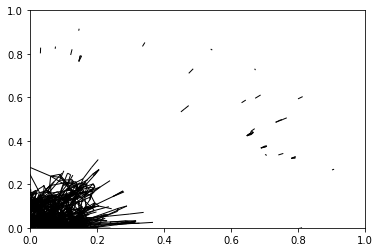

In [44]:
nx.draw_networkx_edges(Graph, pos=nx.spring_layout(Graph))

# Exploratory Data Analysis on Graph

## Graph Level EDA

In [25]:
# check the frequency on each node degree value. This suggests how many connections each node has got
pandas.DataFrame(list(nx.degree(Graph)), columns = ['Node', 'Degree'])

Node  Degree
0           0       0
1          35     168
2        1033       5
3      103482       6
4      103515      11
5     1050679       4
6     1103960       5
7     1103985       2
8     1109199       3
9     1112911       4
10    1113438       5
11    1113831       3
12    1114331       5
13    1117476       3
14    1119505       2
15    1119708       5
16    1120431       4
17    1123756       4
18    1125386       4
19    1127430       2
20    1127913       4
21    1128204       2
22    1128227       4
23    1128314       3
24    1128453       4
25    1128945       1
26    1128959       2
27    1128985       4
28    1129018       2
29    1129027       2
...       ...     ...
2679   739816       3
2680  1140548       1
2681   752684       1
2682  1135955       1
2683   753047       6
2684  1136631       2
2685  1136634       1
2686   753264       3
2687   767763       4
2688   754594       1
2689  1136040       1
2690   756061       3
2691  1136110       1
2692  1136447       4
2693   762980       3
2694  1136449       2
2695   779960       1
2696  1137140       1
2697   814836       1
2698  1138619       1
2699   815073       1
2700   817774       1
2701   820661       1
2702   824245       1
2703  1139009       1
2704  1140231       1
2705   853114       4
2706   853155       4
2707   853115       4
2708   853118       2

[2709 rows x 2 columns]

In [26]:
#check the frequency of each degree value. 
#This is an important feature to check whether the graph exhibits power law distribution
nx.degree_histogram(Graph)

[1,
 485,
 583,
 553,
 389,
 281,
 131,
 82,
 57,
 25,
 26,
 14,
 18,
 5,
 6,
 6,
 7,
 8,
 3,
 5,
 0,
 3,
 1,
 3,
 0,
 0,
 1,
 0,
 0,
 1,
 2,
 1,
 2,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1]

(array([162.,   1.,   1.,   0.,   1.,   0.,   1.,   0.,   1.,   2.]),
 array([  0. ,  58.3, 116.6, 174.9, 233.2, 291.5, 349.8, 408.1, 466.4,
        524.7, 583. ]),
 <a list of 10 Patch objects>)

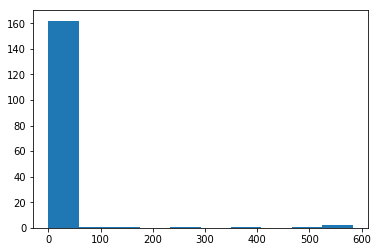

In [27]:
matplot.hist(nx.degree_histogram(Graph))

In [28]:
def plot_degree_dist(G):
    degree_hist = nx.degree_histogram(G)
    degree_hist = numpy.array(degree_hist, dtype=float)
    degree_prob = degree_hist/G.number_of_nodes()
    matplot.loglog(numpy.arange(degree_prob.shape[0]),degree_prob,'b.')
    matplot.xlabel('k')
    matplot.ylabel('p(k)')
    matplot.title('Degree Distribution')
    matplot.show()

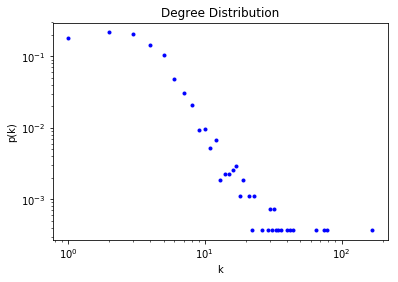

In [29]:
plot_degree_dist(Graph)

In [30]:
def Draw_Node_Degree_Histogram(G):
    degree_sequence = sorted([d for n, d in G.degree()], reverse=True) # degree sequence
    degreeCount = collections.Counter(degree_sequence)
    deg, cnt = zip(*degreeCount.items())
    fig, ax = matplot.subplots()
    matplot.bar(deg, cnt, width=0.80, color="b")
    matplot.title("Degree Histogram")
    matplot.ylabel("Count")
    matplot.xlabel("Degree")
    ax.set_xticks([d + 0.4 for d in deg])
    ax.set_xticklabels(deg)
    # draw graph in inset
    matplot.axes([0.4, 0.4, 0.5, 0.5])
    Gcc = G.subgraph(sorted(nx.connected_components(G), key=len, reverse=True)[0])
    pos = nx.spring_layout(G)
    matplot.axis("off")
    nx.draw_networkx_nodes(G, pos, node_size=20)
    nx.draw_networkx_edges(G, pos, alpha=0.4)
    matplot.show()

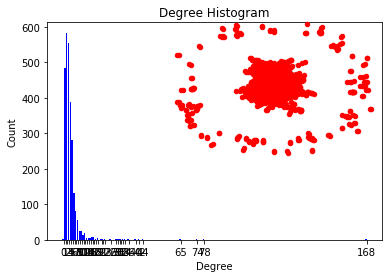

In [31]:
Draw_Node_Degree_Histogram(Graph)data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAYgAAAEWCAYAAAB8LwAVAAAABHNCSVQICAgIfAhkiAAAAAlwSFlzAAALEgAACxIB0t1+/AAAADl0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uIDIuMS4yLCBodHRwOi8vbWF0cGxvdGxpYi5vcmcvNQv5yAAAIABJREFUeJztnXmcHVWV+L+n94YkgNIgJMGAoIYZR1kHBjdkU1yQYdEMPwmSmQQhEcSNAUVnAswoKFscEhWG4JhmlQGVMQwQdXCUEAiypFEzmkAA6QdCJKGTXnJ+f5xbdPXrelv3q7f1+X4+9an3bt2qulWv3j11z3ZFVXEcx3GcbJqq3QDHcRynNnEB4TiO4yTiAsJxHMdJxAWE4ziOk4gLCMdxHCcRFxCO4zhOIi4gHCdlRGSTiOxV7XY4Tqm4gHCqioisE5E+EXlFRF4Wkf8VkTNEpC6eTRFREdk7q+yrIvIf0XdVnaSqvy9wnPeKyIa02uk4Y6Eu/oROw/NhVZ0MvBH4V+CLwLVpnEhEmtM4bq0zUa/bGR8uIJyaQVU3quqdwMeA2SLylwAi0i4il4nIUyLyvIgsFpHOaD8R+YKIPCciz4rI38ff6kXkehG5RkTuEpHNwOFFHO9DIvJIbETzV+O5rqz2HCsia8KI6RkR+ZyIbA/8F7B7UEdtEpHdQzuvCNf1bPjcPo7r/qCIrBaRP4vI0yLy1dixZoT9Pxm2vRRGcgeJyKPhXiwaz31w6g8XEE7NoaorgQ3Au0LR14A3A+8A9gamAhcCiMj7gXOBI8O29yQc8u+Ai4HJwP0Fjrc/cB0wD3g9sAS4M94xj5NrgXlhxPSXwH2quhn4APBsUEdNUtVngQuAQ0I73w4cDHxpHNe9GTgV2BH4IPApEflo1j5/DeyDCekrQhuOBP4COFlEks7jNCqq6osvVVuAdcCRCeW/wjonwTq2N8W2HQr8IXy+DviX2La9AQX2Dt+vB26IbS90vGuAhVlt+Q3wnhztV+DPwMuxZQvwH1l1ovY8hQmfKVnHeS+wIavs/4BjY9+PAdaN5bpztP0K4PLweUbYf2ps+4vAx2LfbwPOqfYz40vlFh9BOLXKVOBPQBewHfBQUHO8DPwklAPsDjwd2+9pRhMvK3S8NwKfjbaF7dPDeXKxv6ruGC2YHSUXJwDHAutF5GcicmieursD62Pf18faUep1IyJ/LSIrRCQjIhuBM4Cds/Z5Pva5L+H7pDztdRoMFxBOzSEiB2EC4n7gBaxj+otYJ7yDqkYd1XPAtNju0xMOGU9ZXOh4TwMXxzt8Vd1OVbvLcW2q+qCqHgfsAvwncHNCGyOexQRWxB6hDEq/boBlwJ3AdFXdAViMjagcJxEXEE7NICJTRORDwI2YiuYxVd0GfAe4XER2CfWmisgxYbebgU+KyEwR2Y5gS8hFEcf7DnBGeNsWEdk+GHcnl+H62kTkFBHZQVUHMNXUUNj8PPB6Edkhtks38CUR6RKRncO1Re6zJV13YDLwJ1XdIiIHYzYKx8mJCwinFvihiLyCvb1fAHwT+GRs+xeBtcCvROTPwD3AWwBU9b+Aq4AVoc4vwz5b85wv3/FWAf8ALAJeCvVOG/cVDvMJYF047xnA/wvnfRITCL8Pqq3dgYuAVcCjwGPAw6FsrNd9JvDP4V5fyPDoxXESEVWfMMhpHERkJvA40K6qg9VuT6WYqNftpIuPIJy6R0SOD+qbnTAX1h9OhE5yol63UzlcQDiNwDwgg7mFDgGfqm5zKsZEvW6nQriKyXEcx0nERxCO49Q/Il2IHIRIV+HKTrG0VLsB42HnnXfWGTNmVLsZjlMRdhwYYPf+fp5ta+Pl1tZqN6dmOPrFF7lQhAERWlX55z335O7Xv77azappHnrooRdUtaAwrWsV04EHHqirVq2qdjMcJ326u2HOHGhpgf5+uPJKmDcvnXNlMrBuHcyYAV01/kKeycAb3wh9fcNlnZ2wfn3tt72KiMhDqnpgoXqpqphEZEcRuVVEnhSRHhE5VEReJyL/LSK/C+udQl0RkatEZG3IHrl/mm1znLohkzHh0NcHr7wCW7fCGWfAkiXlP1d3N+yxBxx+uK27yxJAnh7r1kFb28iy1lYrL5ZMBh580NbOCNK2QVwJ/ERV34plo+wBzgPuVdV9gHvDd7BslvuEZS6WNM1xGo9SO6R162zkkM3ZZ5e3U8tkYPZs2LIFNm+29ezZtd1xzphhI6o4AwNWXgxLlsD06XDEETYSqXWBWGFSExAiMgV4N2HiF1XtV9WXgeOApaHaUiBKN3wcln1SVfVXwI4islta7XOcqtDdbR3REUdYx1TMKCCpE4TS35QLsXq1da5xBgasvFbp6oJrrzW10pQptr722uLUS0uW2Ehs61YbmfX12UitlgVihUlzBLEX5qP972GSku+GiVF2VdXnAMJ6l1B/KiOzT24IZSMQkbkiskpEVmX8h3TqibGqiu65B4aGRpcPDRX/plxOskdA1VbRzJplNod77rH1rFmF98lkbASWTUtLeYVunZOmgGgB9geuUdX9sBz85+Wpn5RVcpQFXVW/raoHquqBXW6EcuqJsaiKIqEymBUg3dpa/Jtysey332h9flublUdk2ygWLLAR0VFHVVdF09UFBx1U/P3I9Vv091dH6NYoaQqIDdgEKA+E77diAuP5SHUU1r2x+vGUxdMYTm3sOPVPLlVRW1vut9ZcHZkIHHlkGRuHda7XX29qmu23t/X11w93ukk2ikWLbES0cWN9qWh+9jO7hmyuvNK9n2KkJiBU9Y/A0yLyllB0BLAGy0c/O5TNBu4In+8ETg3eTIcAGyNVlOM0BF1d1gFlMziY+601l1BpbzfbQLlVO5G6ZsWK0eqaJBtFEpVU0WQycPPNcPXV0NNT3D5LlsDnPz+6fNas9FyH65U0p6vD5tKN0hX/J7ATNs/vvcDvwvp1oa4A38LyyjwGHFjo+AcccIA6Tt2xeLFqe7vq5MmqnZ2qy5YVrg8jl9ZW23fyZDvW4sXpt3v58tHtSFrWrEm/Lap235qbR557/vz8+/T22v1Kandzs22fAACrtIg+3APlHKcalBqMtmQJfPrTpm4aGrIuLXtksXhxum/AmQxMm5Y8oono6ICf/9zsAWmSyZgNZMuW0dvWrIGZM5P3e/BBs58kqZcAli+Ho48uXztrlJoIlKsnxCdedNJmPN4+U6ZAc7N93rYtuU654yKyybZRdHSYsTyOSGWMvPnUWCtX5t42Y0ZxarLxUG2vrjLiAsJxKkEU/3DUUTB1Kuy2m73JFhMLEXePffVV6+AqEReRRNxG8dRTsHTp2GIQxks+IXTwwbm3dXXBxRcnb2tpGemxNRYaLfCuGD1UrS7ltEFA2Q7lOCPp7TV7QT69fT4bwsqVZmsopPvv7KyODr2319pY6XOPxQYRMWfOyP2amgrbggqRZCuq1m9SANwGURoi9os6Ttl58EEbOWzcmLtOezs8/XTy23cmY2+lW7eO3mfbNlsPDdnbezFBYo1EJmOjmeefN7ffXLaHJHp6LLhu111tNDeekU+u32jSJLjvvvRtMiVSrA2irtN9O05dkMtVNU6kHkrqpCL32DPOGFne1GSup5s21Ufm1TTo6oKTTx7bvjNnliZQ8hElDcwWEKXkhapB3AbhOGkTzxeUi0JpM+bNMy+l9nZ7K430/TNnlhZB7KTDjBmjo92h7gPvXEA4TiWIjLsLF5r3T0eHlbe3F2/cnTfP1FD33Vd8ziGnMsRfAiZPtt81bbfjCuA2iIDbIJyKEcVATJo0sdVDjUgmM5z9dr/9avZ3dRuE49QqXV0123E44yCTMTfXiy+2EUR/f907DriKyXEcp1hyBcGFOBf98pcturvekhfmwAVEFh5R7QANFQ3rlIFMBi66aHRq80wG7r4bTj8d+vpGz1lQieDFFHEVk+Nk091tb34tLaYmuPLKujc2OuOguxtOPx3dssUEQF+flX/iEyYAmpuTc0JB3bu5uoBwnDjxtBYRUfyBC4mJR/Q8RMIhhg4NIUkz/UV0dFQu9UhKuIrJceKMZdY3p3GJAuASSNRGRxMtLVxouarq2EANPoJwnJHkinrOF+nsNC7FRMHHWbAAzj23YZ4TH0E4Tpxcs74VinR2GpN4ANyUKea+mp3iPE7Ss1PHuIBwnGxypbVokLdCp0SiKPh77rFI9qVLhyPhs2lpqWuvpWw8kjoQRVJ7RLXzGqXO+uZMHO6+G44/3ubniJMvK28N4ZHUjjNePOLZycV++yW/SdZ5cr5sXMXk1DdRQFtPjwe2OZUjbpuYNKlhkvNl4yMIp36JAtrA4haidNp1nv/GqRNmzbJJisaqhuzpsfmzDz64fPNSlBkfQTj1STygLQpqiz7Xef4bp47o6hrbfBwLFsC++8Jpp9l6wYJUmjdeXEA49UmeAKZ6z39TdqJ8QXff7YKzFujpgUWLRpYtWmTlpRxj6dLS9hkDLiCc+iRfAFOd578pK93dMG0aHHOMLVOnWplTPVauLK08mwqOPtwG4dQnkZEwboPo6DA/ZY9ZMCI1XFyQDgxYkrnNm03vvXYt7L23jcaq5c6bycAdd8CTT5rr6GGHVb4NleTgg0srj5Nr9HHmmanYMVxAOPVL3Ejos7ONZt06aEpQEgwNwT/8w8iy1lYL8iq3gT9fLEkmA9/4Bnzta8Nl3/gGHH00LF9evjbUGjNnwvz5Izv6+fOL6+DzjT5SEBCpBsqJyDrgFWAIGFTVA0XkdcBNwAxgHXCyqr4kIgJcCRwLvAqcpqoP5zu+B8o5Th4yGZu3IJ6ZthDt7XDvvflHFMUGEEZeZm1tsHUrzJ1ro5Ujj4RHHoFTT4XBweR977+/uJFEPQczjsWLqafH1ErZrFlTkoAoNlAOVU1twQTAzlllXwfOC5/PA74WPh8L/BeWJPEQ4IFCxz/ggAO0XMDIteM0BMuWqba22oNdytLZacuyZaq9vaorV9p62TIr32GH5O0R99+f/7wi+c9/4YW5ryk63+LFo9syEZg/f+S9mj+/5EMAq7SIPrwSI4gDVfWFWNlvgPeq6nMishvwU1V9i4gsCZ+7s+vlOr6PIJySqec3zrHS0wNvf7vZH0qlpcWW9nbYutXmQIgfp63N1FjxOZj/939h0SKUHCmxIe82IPcIIjaZk77yyshjdHZazqRG/l2j57e/3+xHY4yhKHYEkbYXkwJ3i8hDIjI3lO0adfphvUsonwo8Hdt3QygbgYjMFZFVIrIq4y57TimEeYNfmzLyoosmhtvnzJnmEpk0z0UBdHBweI7lLVtGCRnt7x8xB/O2005Dg249nwDIKxyOPnqkcIhFy2sU+5ItHKCx3ZujKU/32MOe36OOMuGcdoBdMcOMsS7A7mG9C/Br4N3Ay1l1XgrrHwPvjJXfCxyQ7/iuYnKKprfX1BDZqoyOjomjmujtVT3//LGpnHIs27K+D7S2jiorenn3u1W/852Rqqply3RbZ6cOTp6sg62tOpCv7Z2dI/dtFCK1XhmvlyJVTKmOIFT12bDuBW4HDgaeD6olwro3VN8ATI/tPg14Ns32OROIXIF1W7ZMnMjre+6Bb35z9ChgHIfMfotvHosaC+CEE+CBB+Dcc9E3vpGXr7mGR++9l6HTTkP6+mh+5RWaBwaSjz95cuOmZE+aAjeiAiOm1ASEiGwvIpOjz8DRwOPAncDsUG02cEf4fCdwqhiHABs1j/3BcUoiX2BdI6smIjIZC6zasuW1okgw5FX3xOoWEiSRXaGY44069m23mafTK68gfX1MOuccWh5/HGlvH1FXOjrM3jFligmFxYvN62r9+sbMv5UvY0AFAkLTjIPYFbjdvFdpAZap6k9E5EHgZhGZAzwFnBTq34V5Mq3F3Fw/mWLbnIlGPLAu+22s0SOvMxm48cbSps7MotROP6KgMTrH9pa2NvadOXO0G6wIPPzwxIl5yfVi09FRmRFTMXqoWl3cBuGUTG+v6sKFZnuYMqXx3SOXLbNrbWsrm91hPDaKopf29pFutRPht8pF9j1YuHDcthZqwc01bcrh5iqx1xd1N9eJQ6O6u8avC2C33SxyOgfFvOGPhfhfaEzHj8+t0Gi/VSYDq1fb5/32K+6aynwPfEY5x8lHI84WF4sRoL8fTjyxoHBIm3zCIVE4tbfbrGzxiXca6bfq7obZs4cdBdra4PrrC9tPqnQPfAThIwinERhLWo0aY1tHB0133GFxENk0wigik7E4hpijAFCVAL9aCZRzHKcSrFs3pkC4WkL7+7l/82a2bt1qBVGA3JIlIwMc6zVd+bp10Nw8urypqWa96Or7iXIcx8jnxlsnNG3bxv7z5vHQhz/MPm96E10XXYS2tAxHTUejozlzLOEf1NeoYsaMZJXftm0160XnIwjHaQS6ukx3X8cIsF0mw6HXXcfOF1wAfX1IUkqN5ub6HFV0dcF111ncTURbW+nuqtHIqgLBnW6DcBuE00gsWQJnn20P8pYtpnYaHCwpKK4e0NbWkUkD6ylRX7FeTNkeaevWWQzIZz5jgiVKjjiGAMFibRAuIFxATEzG4mpYL0QdSzSJ0qRJ8NhjNpNcTA2VlotrGmS3dVTbp0yxVCIHHVTRdqVGfC6Nvj5QRdvbYdOmsmSwdTdXx8nFWF0N64Ukl8iZM03//clPWkoL6kc4FEUjRcPH8y/FvNIkKQ9VlCYmpRcct0E4E4tMBk4/fWTCuv7+iZGwb9YsuPTSareiLIwQbmPR49cy+fIvZZOyYHQB4Uws6tDVsKzsuWe1WzAm8o52BgeHvZrqkWyjczEeaRXKYOsqJmdiUYeuhmUhk4GzzoJbbql2S8rPtm2wYgWcfHK1W5KbbINzZP/6wx+Sjc5RYsnWVnM2UB2ete/UU03Q7703HH54uu0uJmFTrS7lSNYXzw8WfXcanOx5mtvaGjsJ3LJlVUvWV7HlqquqfZdzE5/Hu61Ntbn5tXaPSmYYnwQoPtf34sUj9nttaW0d07OLJ+srDvdimqA0shdTnEwGdt99dNrsOqIob6s1a9KffnMslJoCJckbK1eKjoiODnjqqZKeYfdicpx8dHUl5/xpNFasqGvhUBSnn16bwgGGDc7FCogko3Muu1lEc3NqnkwuIBynUclkYOXKardiXOQczLe3m+3hkkvgc5+rZJNKo9gUKJMnmyCPG50ju0V/f/5jDA2lZj9zAeE4jUgUaNVU346KQoKQaG6GO++sD9VgfCbDyOA8NDTsKNHaCldfDfvvPzKnVPT7Qf7RR2urpe9I6T64gHAmNj09pvPddVfzCKn1DicX2V4yWVOr1lPUdDaj2j00BD/8Yf2oCGfNMjfcJC+mJCEXD5TLR1sbPPJIquo1FxDOxKSnx6KKH3hguKy5Gb73vfqKqM5kLP/SJZdY+7duheOPN/VLjHoVDjlZtAjOPLN2bQ/ZZEe35xNuxdotWlstlUqK1Pf403GyiYKOenpyZ7xcsAD23XekcAB7Mz399PqJqO7uNu+WL3/ZOpNNm2BgAL35ZjSaU6GRqXP7Sk6KtVsMDsJLL6X6vLqAcBqH7m5zKXzPe0wAvOc9o1NB9/TY22cuVGs3ojoecRulDElwfRQacMSQxN57V7sF6RDZLTo7bcnF1q3w0Y+mmu7c4yA8DqIxyOdvHs94uXQpnHZa7uO0tcGGDbVni4hn9+zvhw99qDGjokuhtdV+z1mz7Pe/4w548klTsR12WLVbl5vIXvTb38Ltt9vzOXOmtTuuMotn5X36aYt1OPPMkXnEIkrM6lpsHETVo6HHs3gktfMaK1dapGpSlO2UKbZdVXXNmvwRuYsXV/c6kujttQjbWDtHReDW+VLs9STWW7xYtalpZNmhh1p09U03DUcm1wJRVLVI8jXOn59732Kf8SKgyEhqVzE5jUE+vW08+GjmTJg/P7ne4sUwb14arRsfpWT3rFOKVYll11Ng8IwzRhnl9Ze/hE9/Gj72MXjDG+Cii6pvW4p7J2kONcWiRaYGTaLYZ7yMuIBwGoO43rajw8oiHW52xsurr7bUDBdfDOefDzfdBL29tSkcILFjmBA2hiJJ6sRG3J9t28yQX+2pSYsV9LmM70m2iY6OVLO6ug3CbRCNRfZsavUyoX0hIhtEa6u9Lc6ZY51C9P2ss+Cyy6rdynER/e0k9r2QICw5vqOaU5MWm5cpO69Udt4wGPcz7rmYnIlJ0mxqjUB2sFVXF1x44ciO4tZba9cDq0iypxXNLhs3Kc/Alpd4VHWUwjub+fNHCocqz36Y+ghCRJqBVcAzqvohEdkTuBF4HfAw8AlV7ReRduAG4ADgReBjqrou37F9BOFMeKKRRUsLvPJKtVtTVsY8gjjgAHjooeQdqjmCiCjFiykpi2sZrqGWRhBnAz3AlPD9a8DlqnqjiCwG5gDXhPVLqrq3iHw81PtYBdrnOPVJsSkZ6pQRHf/221tg2AknwG23vaZak6SAwO99z9b33ANr18J3vjOsiquFqUmjUe5BB8Epp+SuV2j2wwpcR6pGahGZBnwQ+G74LsD7gFtDlaXAR8Pn48J3wvYjQn3HcZKYAN5NgGU6/da3LBbg+9+39X332TrbIy1S0cycaRHzV15pb9v33GPrekqjUgOzH6Y9grgC+AIwOXx/PfCyqkYJ6jcAU8PnqcDTAKo6KCIbQ/0X4gcUkbnAXIA99tgj1cY7Tk2Ty+2xuTm5Y6E2k/YVbNPgIBx77PAbc9zOdPXVFjy2ciUcfHBybqZ6tUt1dVmm1mwbRAVHQakJCBH5ENCrqg+JyHuj4oSq+WxRo6wBqvpt4NtgNogyNNWpZxrVa6kYslNJDwzA5Zdb6ujnn4e//dtRUbdR+uyaFBJNTaY+Of54+NGPilcLRSOGRiRyTqjS7IdpjiAOAz4iIscCHZgN4gpgRxFpCaOIacCzof4GYDqwQURagB2AP6XYPqfeyc6ZH/mGRxO/TwSSvJsili61jLVZevpaEw5973wnbQ88QHNbG7JtmwmIb30r+ZomIlWc/TA1G4Sq/qOqTlPVGcDHgftU9RRgBXBiqDYbuCN8vjN8J2y/T+s5SMNJl7iBNjLSRp/nzMkdNRtPeNcoRAbP7I501ix782xvr067Ehjxh37Xu+D++9nuoYdoGRhANm+232/2bDMsT5rkwqHKVCOS+ovAuSKyFrMxXBvKrwVeH8rPBc6rQttew83jNU4+A21TE9x112ghsGQJTJ8ORxxRXFRtIwiTmTPh3//dRldTpth6/vyqGbe1qQltaTGvpFWrbM7srLbowABccIFl5F2woCrtdAyPpM4RB+HxEDVOoajU1laLDYjUTUuWwBlnjKzT2Wn+8nHbRSZjndaPfww332xv3/399a+2is8419Vl+X7e9racxuxykG3rUEBFaIr/sTo77Y+WkLb8NbIji51xU2wchOdicuqTeF6aJBXKwMCwuqmnB84+e3SdwUEz+h11lAmbBQtgt90swdsNN1intXFjYbVVPZCthpo5Ez71qVROlcvrRGCkcMBGFJxzjgn0XDTqxEB1gAsIp36ZNct827/4xdx1VK2DSVCp6MCAGXAjIbBoUe436ihFQ6OQyZiAzUdrqwngyZNNCJ9wQlGHLkk7u3kz2y69FM2n8jr44FKO6JQRFxBOfdPVBR//eO7tW7bYzGODg6M2ldSRpZROuWoUCrLr6DAvqPXr4d57LeDsrrvY1tZmqqKkfdrbbb8S7BsCNA0NmYE66bhRINzSpbnTYE90Mhm4+25byjzKdQHh1D8zZw67u2bT0QHPPGOeMR0dsN12pR+/o6M2UjSUk1xBdh0dsHChzV42a5Zd86RJpqLr66Opvz95StNJk8zO89RTlkwuMoo3N0NTU7JASWCEzaK1FV580YzVp51m6wMOsMC4X/yi9GtuRLq7YepUOOYYW6ZNK29K82JmFarVJc0Z5aK1UyesXKm6/fajZ9pqbh75/SMfGTU7W2K9eP1ampGsnESzm02ZotrRobpw4ehrXbZMtbW18IxvnZ0j9+3ttd+kt9dm8WtvL2rGuOzZ4/Ke9+ijK3u/ysWaNarXX2/r8dDba79bod8iAYqcUa7qnfx4FhcQzmskTMuZc7n00pEd46c/nVxvu+1KmsaxLol35Enbct3T1tbhe9jZaYIkH3Fh1Nqq2tY2/LlEwTFiuf/+dO5LWsyfP7L9+aYYLUSul6Ltty/43BYrIFzF5DQGca+myKh66qm5665fD7fcYhPd7713cr1GszskkSvIDsxO0ZSji7jwwtKS4EUOBffcYyq/DRvs82c/O7723377+PavJD095ggRJ98Uo4WoQDI/nzDIaRyy00688IK5q2bT2Qk/+AF85jNmUE1KGQ1wySWNZXcolRkzRs31DJjwnTev9CR4SfWvuGJcTeStbx3f/pUkl7vuypVji/OoQDI/H0E4jUX8jXjmzNHpoJub4e//Hj3jDHNt3bjRPJ1ast6VTj8dPve5yrW7FolGZXGvpNZWi8wuRwe0ZAmaFCB30kkjI7/z/Q7HHTf+dpSbXBH4udx1OzvH7n00a5aNyJYvt2XDhrIGdHoktUdSNz6XXQbnn48ODOR2bZ0yxfL/9PXlThs9UcmeE7kcwiFXJHxHh3lCwcjI7wULRqpnRGxuiFqLbo8SSLa1mZdYlF03yja8eLG99UdEaUf6++H884dHZilTbCS1CwgXEI1NsRPF18JUlBOJBx+0CPaNG0eWL1wIX/pS8j49PWa32HVXOPzw2vutEp41BaS93dSY7e3Wscyda9ewcOHoFCMdHSZAUhZ8tTTlqONUjyggLJeAmDzZgugaLc6h1kmKw+jstDfoXNT6vA8Jz5rAsI0rWl91lQmLJAeALVtsBHLkkTXxPLoNwmls8gWELV5sUcL1NhVlIxD3OotsDfUupHM9a0ls3Zo/0WSNpHVxAeE0NlFHFE8BESX3y2R8QppqEnd9bQQhHRd6kyYVrt/RkTvRZI24V7uAcCYO0dvd1q02lP/yl4ubF8JJj3xxGPVIJPTuu89GqB0dueuKmPF/4UKrV4MjqaKM1CJymKr+olBZpXEjtVOQYozUbqB20iKTsRxVF19sMSX9/clT42bP15Ey5TZSXw3sX0SZ49QWhYyoup0MAAAZcklEQVTUMKzzdQHhlJuuLvPKmjfPnrHI3TUuCOJuxDWiWorIKyBE5FDgb4AuETk3tmkK0JxmwxynLBRjOKwhna/ToERR5JmMCYiI7m7LVBs9o62tltq8RuwxhWwQbcAkTJBMji1/Bk5Mt2mOUwbiRuokOjoslfXq1fU9Y5xT+3R3m7rzqKNgjz3gH//RIvbjLzADA1ZWI89isTaIN6rq+gq0pyTcBuEUTaQLvuQSS7exdSu8731mTIzy2NTY25vTQBQbsAkWWb1ihRnvU6Lcc1K3i8i3ReRuEbkvWsbZRsepHJEu+O/+zob4AwOWuyYSDlBzb29OA1FoBr84Q0M1o/Is1kh9C7AY+C6QY9Jex6lxenoKz8Pc3OwGa2d89PRYhtZ4Tq9ig+haWy3VRo08f8UKiEFVvSbVljhO2uRKtxynht7enDokO6ng/Plw9dXDtrDTT0/Ov7R0Key4Y/mSIZaJYlVMPxSRM0VkNxF5XbSk2jLHKTe50i1H1Njbm1NnFJoQaNYsy1S7cOHIFCPXXQcnnwxHH11zz16xI4jZYf35WJkCe5W3OY6TItH8EPE/8Zw59ueEmnt7c+qMYiYEyo6LyA6MSyO1+jgoSkCo6p5pN8RxKsLVV8OZZ47WETvOeMk1Qk0qT5pdrwZjIop1c02c3FdVE+ZzfG2fDuDnQDsmiG5V1a+IyJ7AjcDrgIeBT6hqv4i0AzcABwAvAh9T1XX52uVurk7dkGS4dMpLhdNVJJLLBlGIQhMolfl6yu3melBseRfwVeAjBfbZCrxPVd8OvAN4v4gcAnwNuFxV9wFeAuaE+nOAl1R1b+DyUM9x6p8FC2Dffe3tcN997btTXqIgtCOOgOnTLealGlx9NaxZA9dfb+tihAOYYEuaHyLyqqsSY5pRTkR2AL6nqoWERFR/O+B+4FPAj4E3qOpgSOXxVVU9RkSWh8+/FJEW4I9Al+ZpoI8gnNQZ71tpT48JhWzWrPGRRLnI9fa9eHH+CYiKOW6l7AF1PoLI5lVgnyIa0SwijwC9wH8D/we8rKqDocoGYGr4PBV4GiBs3wi8PuGYc0VklYisynhAk5Mm3d2WEuHww209lrTg+QyX4yGTsWk7/T9gArwlwZx69tljvz/d3TB1KhxzjC1Tp6Y7KoncYOPBdDXgVVeUgBCRH4rInWH5MfAb4I5C+6nqkKq+A5gGHAwkvTJF7+lJ88mPeodX1W+r6oGqemCXe5w4aZHJwOzZ5rO+ebOtZ88e7nCK7aBLMVwWy2WXWYd1+OE+nwXkDkIb68xsmYzFK2RH2Z9xRrpCYtYs2LDBIvyXL4dnnql62pdiRxCXAd8IyyXAu1X1vGJPoqovAz8FDgF2DCokMMHxbPi8AZgOELbvAPyp2HM4TllZvXpkBwH2ffXq0kYWkWttnPnzx65eOuUU9POft7Zs3mwqiTlzRgqqRhtdFLqeri445ZTR5YOD8NJLpd+HdetM95/EeEYlxdDVZfEQNRITUZSAUNWfAU9imVx3AgrGjItIl4jsGD53AkcCPcAKhjPBzmZ4JHInw/EWJwL35bM/OE5VePnl/COLJMZquMzmsstg2bLRQ+2mpuE35XKoxWqJeAbUXKOlTCa5vL8fTjyx9FHWjBkWUZ9EDc0XXRFUteACnAysB5Zirqh/AE4ssM9fAauBR4HHgQtD+V7ASmAtluOpPZR3hO9rw/a9CrXrgAMO0PFipmhbou/xtTNB6e1VbWsb+YC0tanedNPIsmhZvjz99jQ3J5+7tdW29/ba56Rt2cdavtyuZfny0dujOitXJm+rFL29qp2dI6+ns3N0m1auVJ08OfneREt7u+qaNcWfe9ky1ZaW0cdJOn8dAqzSYvr+oirBr4FdYt+7gF8Xs2+aiwsIJ1WWLbMOYfvtbb1smXWo1RAQuc4Lqpdemr/OVVcNd2rLlo0WfK2tVp7vuqvBypWjBQSoLlw4sl5vrwmAfAICTMCWci29varnnWfHnjSpuveizJRbQDyW9b0pu6waiwsIJ3Wy36RzjSzSfqvM1fkfc0zhOu3tqh0dqosXJ3e42aOQSl9frtHKmjW5rye77uLFhQUE2H0o9VpqYTRVZooVEMUaqX8iIstF5DQROQ2LZbhrDBqtukJkZJyEMwHp6rKJWyKDYVeX2RI6O21il85O+562QXG//Uz/HaelBb73vZF1kuYc2LrVbCVnnZX7+JEBfvXq0R5B/f3D8QDlJrIxJHlkbdqUfD0tLaPtAPPmWdxDoTkXxhJ4lv0MTCDyCggR2VtEDlPVzwNLMLvC24FfAt+uQPscp/aYNQvWr7dZv9avH+mKmJYHUVeX5eXp6DDB1NEBN9wwstOKC6+kKVaHhgrPaPbUU6WVj4dMxqLL+/qGPbJOO2343s2YkexNlCsl+7x55ia6cGHuKWY9nXtJFBpBXAG8AqCqP1DVc1X1M9jo4Yq0G+c4NUv2W2UmAxddVNjjZjxE6aJXrLB1ko98JLy+/vXSjt3WZiOQXAKkmKkyS6XQaGUswWNRttQorXZ81FUDgWf1Rt5UGyLyuKr+ZY5tj6nq21JrWRGknWojXu44OenuhtNPR7dsGemC2tlpnXU1OqRMBqZNKzyLWXu7uclee60Jl0qmBrn7botSzmb5cosDiBhPyosaS59dK5Qr1UaOcRoAnaU1yXEakEzGAtWyhQNU12c+21aSSzd/6aUj1WTlDuzLR5JdpbXVyuOMJ3isxgLP6o1CAuJBEfmH7EIRmQM8lE6THKeOyDcZ/cBAZfXd2faPuK3kkUdGt7OtDT7+8dEdZ7kC+wqRZFdZutQ78hqi0IRB5wC3i8gpDAuEA4E24Pg0G+Y4dUGuPECdnaa2qVRn191tI5m2NmtPpDKKT0xz/fVWp6kJtm3L376ZMyuTbXbWLDjyyOrP4+AkUuyEQYcDkS3iCVW9L9VWFYnbIJyaIOqcW1utc77gAvOoqVRnl5QqOpf9oxYm1akUE+laS6RYG0SxU46uwHIoOY6TTbXfgpcsQfv6RtpAIvtHdluSprocL2PpiNPuvIPjAM3N5tp63XVVz4xaj4x1PgjHceJUK5gqk4GLLx5tIK+U/SNfoFuhfdJyBy6Uqt0pGhcQjlPPrFtnrqrZnH9++sKqUKBbrn3mzLG6GzcmpysfL/lStTsl4QLCceqZJCN5R8f4ptoslrGk5Ujy+urrq94c0k5eXEA4Tj0TRRt3dsKUKbau5WjhXF5fF19cvlFEUk6qKFLcKQkXEI5T70TxDvfcMzo3VJoUG+gWp6vL1F/ZtLWVL6iwWgkVGxAXEI7TCFTDSD7WQLd580Yn0yu3UT1fQkWnaIpyc3Ucx0lkLC6+XV2mBotiRwYG0gkqTMOld4LhAsJxnPExlo642rEjTlG4gHAcpzr4G37N4zYIx3EcJxEXEI7jOE4iLiAcx3GcRFxAOI7jOIm4gHAcx3EScQHhOI7jJOICwnEcx0nEBYTjOI6TSGoCQkSmi8gKEekRkSdE5OxQ/joR+W8R+V1Y7xTKRUSuEpG1IvKoiOyfVtscx3GcwqQ5ghgEPquqM4FDgLNEZF/gPOBeVd0HuDd8B/gAsE9Y5gLXpNg2x3EcpwCpCQhVfU5VHw6fXwF6gKnAccDSUG0p8NHw+TjgBjV+BewoIrul1T7HcRwnPxWxQYjIDGA/4AFgV1V9DkyIALuEalOBp2O7bQhl2ceaKyKrRGRVxueYdRzHSY3UBYSITAJuA85R1T/nq5pQpqMKVL+tqgeq6oFdnujLcRwnNVIVECLSigmH76vqD0Lx85HqKKx7Q/kGYHps92nAs2m2z3Ecx8lNml5MAlwL9KjqN2Ob7gRmh8+zgTti5acGb6ZDgI2RKspxHMepPGnOB3EY8AngMRF5JJSdD/wrcLOIzAGeAk4K2+4CjgXWAq8Cn0yxbY7jOE4BUhMQqno/yXYFgCMS6itwVlrtcRzHcUrDI6kdx3GcRFxAOI7jOIm4gHAcx3EScQHhOI7jJOICwnEcx0nEBYTjOI6TiAsIx3EcJxEXEI7jOE4iLiAcx3GcRFxAOI7jOIm4gHAcx3EScQHhOI7jJOICwnEcx0nEBYTjOI6TiAsIx3EcJxEXEI7jOE4iLiAcx3GcRFxAOI7jOIm4gCgCEVscx3EmEi4gHMdxnERcQDiO4ziJuIBwHMdxEnEB4TiO4yTiAsJxHMdJxAWE4ziOk4gLCMdxHCeR1ASEiFwnIr0i8nis7HUi8t8i8ruw3imUi4hcJSJrReRREdk/rXY5juM4xZHmCOJ64P1ZZecB96rqPsC94TvAB4B9wjIXuCbFdjmO4zhFkJqAUNWfA3/KKj4OWBo+LwU+Giu/QY1fATuKyG5ptc1xHMcpTKVtELuq6nMAYb1LKJ8KPB2rtyGUjUJE5orIKhFZlclkUm2s4zjORKZWjNRJmY40qaKqfltVD1TVA7u6ulJuluM4zsSl0gLi+Uh1FNa9oXwDMD1WbxrwbIXb5jiO48SotIC4E5gdPs8G7oiVnxq8mQ4BNkaqKMdxHKc6tKR1YBHpBt4L7CwiG4CvAP8K3Cwic4CngJNC9buAY4G1wKvAJ9Nql+M4jlMcqQkIVZ2VY9MRCXUVOCuttjiO4zilUytGasdxHKfGcAFRAj6rnOM4EwkXEI7jOE4iLiAcx3GcRFxAOI7jOIm4gHAcx3EScQHhOI7jJOICwnEcx0nEBYTjOI6TiAsIx3EcJxEXEGPAA+Ycx5kIuIBwHMdxEnEB4TiO4yTiAsJxHMdJxAWE4ziOk4gLCMdxHCcRFxCO4zhOIi4gHMdxnERcQDiO4ziJuIBwHMdxEnEB4TiO4yTSUu0G1DPxlBuq1WuH4zhOGvgIwnEcx0nEBUSZ8UR+juM0Ci4gHMdxnETcBlEmfOTgOE6j4SMIx3EcJ5GaEhAi8n4R+Y2IrBWR86rdnnIjMrw4juPUOjUjIESkGfgW8AFgX2CWiOxb3VaNnUgIFCMUXGA4jlOL1IyAAA4G1qrq71W1H7gROC6tk9XCm3zS+bMFSr46+fbNdZz4fvnuQfa27HrVvndJlOM3dUHu1DqV7LtqyUg9FXg69n0D8NfZlURkLjA3fN0kIr8Z53l3Bl4Adg43/QWR4bLsdVp1YnVfa1fCcbLuRWJ5yefKdfzsbaXsV03G265i74fjVJNxPotvLKqWqtbEApwEfDf2/RPA1RU476poHf+ca512nXi7cm3Lbnuu6ynlXIXuT6n7VflZGle7ir0fvvhSzaUSz2ItqZg2ANNj36cBz1apLY7jOBOeWhIQDwL7iMieItIGfBy4s8ptchzHmbDUjA1CVQdFZD6wHGgGrlPVJypw6m9nrZPKKlknuzxpW77y8Z4r3zlK2a+ajLddxd4Px6kmqT+LEnRZjuM4jjOCWlIxOY7jODWECwjHcRwnkQkrIEJaj40iMigivSKyQkSeFJFXReQZEXkibPuziDwW6m4JS5+IaFi2icgrIvKyiAzEyodinwdFZGts+7bY+qWw3harOxjKt4Syp0WkPxyzL7TzwNDm58O+A2F5MdQbTGjH1lB3MBx7jYgsFpFNInKxiPxWRHpEZIOI/CjcpzeJyOaw3Cwifwr1HxeR60SkVUSuFpFNVfoddxSRW8M96RGRQ0Xkq+E3fCQsx+bZ/y2xeo+E3/uc2LZnwr17LNomIu8QkV+F+qtE5ODKXbEzEQj/rV4ReTyrfEFIR/SEiHw9lLWKyNLwjPaIyD+Wqx0TUkDIcFqPucDfAFOARcBMYC9gM/BjQIA1wMPAZ1W1A3hr2L4NeAp4FejF7uWNmLvuC6HOfOBlYBNwXajzKrAFOCQcew2wAngeuAYYCHUFOAXoBy4CjgAuAxYDrwO+DHQDjwEzgD8AHwbagc8DG4EfAS8C94b2Hg+sBu4DPgvsAhyOOStMD9f2HeCB2O26LeyzAnM9fgH4KfA2oBP4Z2DHIm99GlwJ/ERV3wq8HegJ5Zer6jvCcleunVX1N1E94ADs97k9bH4VeBz7nY+Ibfs68E9hnwvDd8cpJ9cD748XiMjhWHaJv1LVv8D6A7AYsnZVfRv2DM8TkRnlaMSEFBAMp/W4CevcXwberMYfsc72aKxTbQbeDVwb9h0AWsM+W0Kd1cB2wFVYx/wU0IEJmVfDfofH9s1gAgFMeLwdmAz8D9ah/zSc98/AK0Czqv4P8CusU38B++2OBP5VVZ/COsYWrNNeBewAfC8c9zZM4DSH9RNYJOUU4BehTf8M7A58EBOeiMg0LC/WV8P1tIbrQ8274UFgFvCFYm98ORGRKcR+G1XtV9WXx3HII4D/U9X14fvl2LVpOE+0TbF7B3afPV7HKSuq+nPgT1nFn8L+71tDnd6oOrC9iET//36s7xg3E1VAZKf1GAhliMhewFHAm4Gt2Fv1LsAvRGQ18E+YANgJeBMmIPbC7mUmdrzm8LkL66R3xTr71nCuh4A9sQ56cij/N6wDfwewPfAcMAnr0MHeVI8F9gY+Hdr4LhF5BBs93AwMYa7CYAKiHXvTEGzEcR+wABtlbMJGOU3Ax4BHMUGwW9j/3zBBNgj8BfAVLIUHItIKfAb4oao+l+9mp8he2D3/dxFZLSLfFZHtw7b5IvJoGKrvVOTxPo7dI0TkI8AzqvrrsO34aBtwDnCpiDyN3duyDekdJw/R//0BEfmZiBwUym/FNBbPYX3TZaqaLVzGxEQVEEmprlREJgF3Yx3s7sA64LdYJ9sFnI0JhH2Bb2Id5ySgL8d5zsKEzFZgaSgbxKR7N9aZfyl8PjScZyfg/2E/+FJgLbBZRC7ARgm/xwTBadiIYZdwnPOwznI1prZqAm4I2/4Oe8s4MXy+HRuN9AHnhnbtianIvgF8keGRytbQtq2YOivyi74+nOMzOa69ErQA+wPXqOp+2D07D1PVvQkTtM9h15QXseDMjwC3iMh2wAWY+iji/cAt4fOngM+o6nTs+q/FcdKnBesfDsFe8G4WEcE0IkNYn7Un8NnwojtuJqqAyE7r0Qr8EVPFrMP0649gapi3Yaqk72M/xPbYEG4RsD7sNwX7gbpix1NMZfEi0Ia9ob8e+5GnYIKoLdS9CvgXrENqwzr2beGcL2Bqnw9jw8fvY53XCcAzmM7x+6r6dUz4/BTr6PuAl7ARwJGhfV/AVERPYA/SFIY7wZOwDvKbwF8C+2Fv1HuG8+0B/AYb/Rwd6jcDa0VkHbCdiKwtdOPLzAZgg6pGNpNbgf1V9XlVHVLVbZhNpRgj8geAh1X1eUy47An8OlzbdEyFGL1YzAZ+ED7fUuTxHWe8bAB+EFThK7E+Ymfspe8nqjoQ1E6/AA4sxwknqoB4La0H1kHvgP3J1wEnquo0rONdjwmKX2Od5+OY9B4kqKQw9dAbsI73xFAWCZ9/wt68n8SMy5sw28VL2A+4DRMk/xLOfTQmUE4CHlDVb2IG6dmh/IlQ9pFwzB0IUeci8teYeugI7K15S6i3FRvxNGECbwtmo9iTYUP2APZGPA0bmfwWWK6q22Ed4TeBuzDB9fNwHTuo6htUdYaqzgBeVdW9i/8Jxk+wFz0tIm8JRUcAa0Rkt1i147HfrRCzCCokVX1MVXeJXdsW4AvhfGA2h/eEz+8Dfje+K3GcovhP7HlDRN6MvUy+gKmV3ifG9lgf9WRZzljtjITVWjBd/p+xzn4I66j/iBmV+zBp/WKo83/h+2PY6KEn1I+WbQx39qUufWE9GDuWYh17dtm2ULYRMypraF90/n6s894Wu6akdm3DhMKvsVHEJsyg/hjwS2AO8KNwn/YK17sZe1seCp8fCcuFod6mKv2O78AE3qPYH2gnzPbyWCi7E9itwDG2C7/1Djm2DQF7xsreidmQfo15fB1Q7efZl8ZasJeV58L/dEP4T7YB/4G98DwMvC/UnRT+m09g6uXPl6sdnmrDcRzHSWSiqpgcx3GcAriAcBzHcRJxAeE4juMk4gLCcRzHScQFhOM4jpNIzcwo5zi1gogMYW6yrZhb8VLgCrXAO8eZMLiAcJzR9KllakVEdgGWYUGJXxnvgUWkWVWHxnscx6kErmJynDyopS6YiyX/ExFpFpFLReTBkAxwHoCINInIv4U8/T8SkbtE5MSwbZ2IXCgi9wMnhTk2fiIiD4nI/4jIW0O9LhG5LRz7QRE5rGoX7jj4CMJxCqKqvxeRJiyB4XHARlU9SETasSy/d2OpWWZgubt2waLPr4sdZouqvhNARO4FzlDV34UUKf+GpVC4EpvH4n4R2QNLGjmzIhfpOAm4gHCc4ogS9R0N/FU0OsBUT/tg6TduCXaKP4rIiqz9bwIIGYP/BssaG21rD+sjgX1j5VNEZLKqvlLui3GcYnAB4TgFCKmTh7DJpQRYoKrLs+p8sMBhNod1E/ByZOPIogk4VFVzpY93nIriNgjHyYOIdGGZeBepJS5bDnwqTJiEiLw5ZNC8Hzgh2CJ2Bd6bdDxV/TPwBxE5KewvIvL2sPlubAKn6NxJQsRxKoaPIBxnNJ1hlr7IzfV7WMpzgO9itoaHw2QtGeCj2FwiR2CZNn+LZXndmOP4pwDXiMiXwjluxDLDfhr4log8iv03fw6cUe6Lc5xi8WyujlMmRGSSqm4SkdcDK4HDdHgOCcepO3wE4Tjl40cisiOWt3+hCwen3vERhOM4jpOIG6kdx3GcRFxAOI7jOIm4gHAcx3EScQHhOI7jJOICwnEcx0nk/wP43RL1dTANkQAAAABJRU5ErkJggg==

In [32]:
#Check Graph density - (density) = 2*(the number of edges) / [(the number of nodes) * (the number of nodes - 1)]
# Density closer to 1 means graph is highly connected and closer to 0 means graph is loosely connected
nx.density(Graph)

0.0014389367898350756

In [33]:
#Check summary of information for the graph G or a single node n. This can be looked as a summary statistics
print(nx.info(Graph))

Name: 
Type: Graph
Number of nodes: 2709
Number of edges: 5278
Average degree:   3.8966


In [34]:
#Check whether the graph edges are directed or not. This is important to understand as node level metrics, Graph algorithms like random walks
#Node embeddings etc behaves differently if graph is directed or undirected. This returs a boolean - True or False
nx.is_directed(Graph)

False

In [35]:
#Check whether a graph has no edges
nx.is_empty(Graph)

False

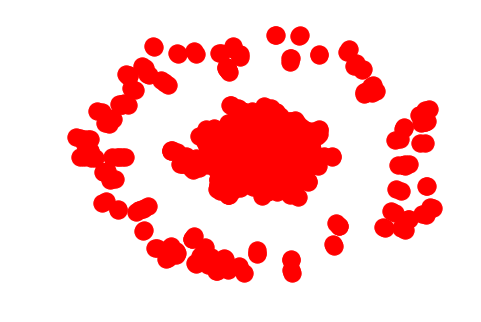

In [36]:
#Reverse view of a directed graph
nx.draw(nx.reverse_view(nx.to_directed(Graph)))


In [37]:
#Check whether there are any self loops in the graph
nx.number_of_selfloops(Graph)

0

In [38]:
#Check whether the graph is weighted. This returns a boolean - True or False
nx.is_weighted(Graph)

False

In [39]:
#Check whether the graph is negatively weighted. This returs a boolean - True or False
nx.is_negatively_weighted(Graph)

False

In [40]:
#Check the algrebraic connectivity for a graph. 
#The algebraic connectivity (also known as Fiedler value or Fiedler eigenvalue) of a graph G is the second-smallest eigenvalue (counting multiple eigenvalues separately) of the Laplacian matrix of G.[1] 
#This eigenvalue is greater than 0 if and only if G is a connected graph
#This can be implemented only for an undirected graph
nx.algebraic_connectivity(Graph)

0.0

In [41]:
#Check the Fiedler Vector. 
#The Fiedler vector of a connected undirected graph is the eigenvector corresponding to the second smallest eigenvalue of the Laplacian matrix of of the graph
#This can be implemented only for an undirected graph
nx.fiedler_vector(Graph)

NetworkXError: graph is not connected.

In [ ]:
#The resultant vector will be of size of the graph (Nodes)
len(nx.fiedler_vector(Graph))

In [42]:
#Check the spectral ordering of a graph. The spectral ordering of a graph is an ordering of its nodes 
#where nodes in the same weakly connected components appear contiguous and ordered by their corresponding elements
#in the Fiedler vector of the component
nx.spectral_ordering(Graph)

['0',
 312409,
 62676,
 644361,
 644363,
 645452,
 1154071,
 645016,
 14083,
 1103016,
 644843,
 14090,
 1131274,
 1131192,
 71736,
 1152259,
 1152991,
 643069,
 16843,
 1131189,
 1131164,
 1131172,
 643003,
 1131314,
 642621,
 644470,
 644494,
 642798,
 126793,
 1131258,
 644448,
 645870,
 1103499,
 16819,
 1131180,
 646334,
 646357,
 645046,
 1131301,
 644441,
 1112650,
 644334,
 644427,
 1131167,
 24476,
 1131257,
 1131312,
 1131335,
 642894,
 643485,
 1102364,
 1131305,
 1131236,
 1131334,
 504,
 644577,
 643239,
 1153024,
 1106546,
 506,
 643221,
 644093,
 642681,
 89416,
 1131270,
 1127551,
 646195,
 134315,
 134320,
 1127541,
 645897,
 126927,
 561789,
 23069,
 561674,
 642847,
 646440,
 137130,
 1127566,
 74700,
 1116044,
 1153786,
 134314,
 562067,
 561582,
 67584,
 561581,
 561611,
 646286,
 126920,
 23070,
 561595,
 87915,
 134316,
 142268,
 1110209,
 561610,
 1117920,
 1127558,
 134307,
 1131223,
 561568,
 561593,
 561613,
 65074,
 74698,
 153063,
 38537,
 561809,
 645571,


In [ ]:
#Check the eigenvalues of the adjacency matrix of G.For MultiGraph/MultiDiGraph, the edges weights are summed
nx.adjacency_spectrum(Graph)

In [ ]:
#Check the eigenvalues of the laplacian matrix of G.For MultiGraph/MultiDiGraph, the edges weights are summed
nx.laplacian_spectrum(Graph)

In [ ]:
#Check the eigenvalues of the laplacian matrix of G.For MultiGraph/MultiDiGraph, the edges weights are summed
nx.laplacian_spectrum(Graph)

In [ ]:
#Check the eigenvalues of the modularity of matrix of G.For MultiGraph/MultiDiGraph, the edges weights are summed
nx.modularity_spectrum(Graph)